In [2]:
import numpy as np
import sympy as sp
sp.init_printing()

# 1.13
## a)

In [3]:
a, b = sp.symbols("a, b")

def phi(x):
    return 1 / (1 + sp.exp(x))

In [14]:
a1 = a * 5 + b
b1 = -3 * b + 2 * a
a2 = phi(a1)
b2 = phi(b1)
a3 = 3 * a2 - b2
b3 = 6 * b2 + 4 * a2
a4 = phi(a3)
b4 = phi(b3)

def net(_a, _b):
    return phi(-2 * a4 + b4).subs(a, _a).subs(b, _b).evalf()

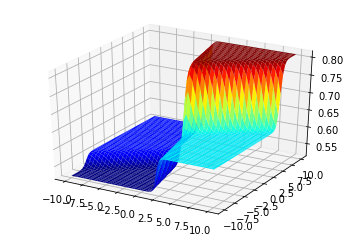

In [46]:
sp.plotting.plot3d(phi(-2 * a4 + b4))

In [28]:
values = np.zeros((400,3))
idx = 0
for x in range(-10, 10, 1):
    for y in range(-10, 10, 1):
        values[idx] = np.array([x, y, net(x,y)])
        idx = idx + 1

array([[-10.        , -10.        ,   0.51920915],
       [-10.        ,  -9.        ,   0.51925152],
       [-10.        ,  -8.        ,   0.52006775],
       ..., 
       [  9.        ,   7.        ,   0.80845175],
       [  9.        ,   8.        ,   0.81132379],
       [  9.        ,   9.        ,   0.8114706 ]])

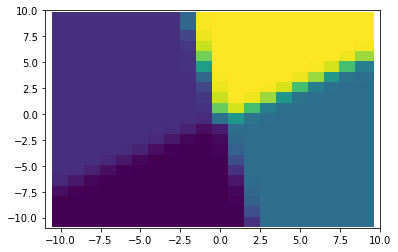

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(values[:,0], values[:,1], c=values[:,2], marker=",", s=300)

For two given inputs $a$ and $b$ the input-output mapping is given in the previous cell.

## b)

If the last neuron is linear instead of the function $\varphi$ then the input-output mapping is calculated in the next call, where $w$ is the weight of the last neuron.

In [57]:
def phi_linear(x):
    return 5 * x

In [58]:
a1_l = a * 5 + b
b1_l = -3 * b + 2 * a
a2_l = phi_linear(a1_l)
b2_l = phi_linear(b1_l)
a3_l = 3 * a2_l - b2_l
b3_l = 6 * b2_l + 4 * a2_l
a4_l = phi_linear(a3_l)
b4_l = phi_linear(b3_l)

def net_linear(_a, _b):
    return phi_linear(-2 * a4_l + b4_l).subs(a, _a).subs(b, _b).evalf()

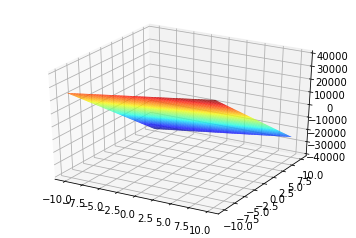

In [59]:
sp.plotting.plot3d(phi_linear(-2 * a4_l + b4_l))

In [60]:
values_l = np.zeros((400,3))
idx = 0
for x in range(-10, 10, 1):
    for y in range(-10, 10, 1):
        values_l[idx] = np.array([x, y, net_linear(x,y)])
        idx = idx + 1

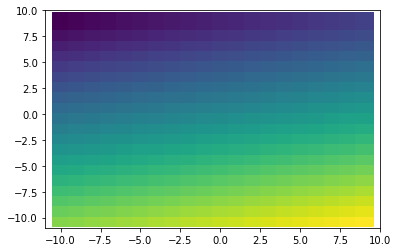

In [61]:
plt.scatter(values_l[:,0], values_l[:,1], c=values_l[:,2], marker=",", s=300)

# New Classification Example

New data:

$C_1 = (1, 2), (1, 0), (0, 0)$

$C_2 = (-1, 0), (-1, 2), (0, 2)$

Apply trick to $C_2$:

$C_1 = (1, 1, 2), (1, 1, 0), (1, 0, 0)$

$C_2 = (-1, 1, 0), (-1, 1, -2), (-1, 0, -2)$

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 2) | (1, 0, 0) | 1 | No | (1, 0, 0)
(1, 1, 0) | (1, 0, 0) | 1 | No | (1, 0, 0)
(1, 0, 0) | (1, 0, 0) | 1 | No | (1, 0, 0)
(-1, 1, 0) | (1, 0, 0) | -1 | Yes | (0, 1, 0)
(-1, 1, -2) | (0, 1, 0) | 1 | No | (0, 1, 0)
(-1, 0, -2) | (0, 1, 0) | 0 | Yes | (-1, 1, -2)

end epoch 1

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 2) | (-1, 1, -2) | -4 | Yes | (0, 2, 0)
(1, 1, 0) | (0, 2, 0) | 2 | No | (0, 2, 0)
(1, 0, 0) | (0, 2, 0) | 0 | Yes | (1, 2, 0)
(-1, 1, 0) | (1, 2, 0) | 1 | No | (1, 2, 0)
(-1, 1, -2) | (1, 2, 0) | 1 | No | (1, 2, 0)
(-1, 0, -2) | (1, 2, 0) | -1 | Yes | (0, 2, -2)

end epoch 2

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 2) | (0, 2, -2) | -2 | Yes | (1, 3, 0)
(1, 1, 0) | (1, 3, 0) | 4 | No | (1, 3, 0)
(1, 0, 0) | (1, 3, 0) | 1 | No | (1, 3, 0)
(-1, 1, 0) | (1, 3, 0) | 2 | No | (1, 3, 0)
(-1, 1, -2) | (1, 3, 0) | 2 | No | (1, 3, 0)
(-1, 0, -2) | (1, 3, 0) | -1 | Yes | (0, 3, -2)

end epoch 3

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 2) | (0, 3, -2) | -1 | Yes | (1, 4, 0)
(1, 1, 0) | (1, 4, 0) | 5 | No | (1, 4, 0)
(1, 0, 0) | (1, 4, 0) | 1 | No | (1, 4, 0)
(-1, 1, 0) | (1, 4, 0) | 3 | No | (1, 4, 0)
(-1, 1, -2) | (1, 4, 0) | 3 | No | (1, 4, 0)
(-1, 0, -2) | (1, 4, 0) | -1 | Yes | (0, 4, -2)

end epoch 4

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 2) | (0, 4, -2) | 0 | Yes | (1, 5, 0)
(1, 1, 0) | (1, 5, 0) | 6 | No | (1, 5, 0)
(1, 0, 0) | (1, 5, 0) | 1 | No | (1, 5, 0)
(-1, 1, 0) | (1, 5, 0) | 4 | No | (1, 5, 0)
(-1, 1, -2) | (1, 5, 0) | 4 | No | (1, 5, 0)
(-1, 0, -2) | (1, 5, 0) | -1 | Yes | (0, 5, -2)

end epoch 5

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 2) | (0, 5, -2) | 1 | No | (0, 5, -2)
(1, 1, 0) | (0, 5, -2) | 5 | No | (0, 5, -2)
(1, 0, 0) | (0, 5, -2) | 0 | Yes | (1, 5, -2)
(-1, 1, 0) | (1, 5, -2) | 4 | No | (1, 5, -2)
(-1, 1, -2) | (1, 5, -2) | 8 | No | (1, 5, -2)
(-1, 0, -2) | (1, 5, -2) | 3 | No | (1, 5, -2)

end epoch 6

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 2) | (1, 5, -2) | 2 | No | (1, 5, -2)
(1, 1, 0) | (1, 5, -2) | 6 | No | (1, 5, -2)
(1, 0, 0) | (1, 5, -2) | 1 | No | (1, 5, -2)
(-1, 1, 0) | (1, 5, -2) | 4 | No | (1, 5, -2)
(-1, 1, -2) | (1, 5, -2) | 8 | No | (1, 5, -2)
(-1, 0, -2) | (1, 5, -2) | 3 | No | (1, 5, -2)

no change

bias is $1$